<a href="https://colab.research.google.com/github/sanjeev29/EVA-4/blob/master/S9/s9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/models/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/models


# Import Libraries

In [17]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

!pip install albumentations

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [0]:
from utils import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane  deer  ship horse


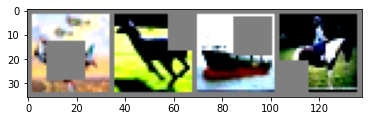

In [19]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot_alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
from resnet import ResNet18

# Model parameters

In [21]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim

from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)

# Training and Testing

In [0]:
from utils import train
from utils import test

# Training and testing our model

In [9]:
epochs = 20
last_epoch = False

for epoch in range(epochs):
  train.train(net, device, loader.trainloader_alb, optimizer, criterion, epoch)
  scheduler.step()
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, loader.testloader, criterion, last_epoch)

Epoch= 0 Loss=1.1172821521759033 Batch_id=781 Accuracy=46.76: 100%|██████████| 782/782 [01:45<00:00,  6.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0183, Accuracy: 5956/10000 (59.56%)



Epoch= 1 Loss=1.125551462173462 Batch_id=781 Accuracy=64.82: 100%|██████████| 782/782 [01:46<00:00,  6.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 7080/10000 (70.80%)



Epoch= 2 Loss=0.7608025074005127 Batch_id=781 Accuracy=72.76: 100%|██████████| 782/782 [01:46<00:00,  6.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0099, Accuracy: 7790/10000 (77.90%)



Epoch= 3 Loss=0.6773042678833008 Batch_id=781 Accuracy=76.35: 100%|██████████| 782/782 [01:45<00:00,  6.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0096, Accuracy: 7959/10000 (79.59%)



Epoch= 4 Loss=0.6900292634963989 Batch_id=781 Accuracy=79.57: 100%|██████████| 782/782 [01:45<00:00,  6.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0092, Accuracy: 8002/10000 (80.02%)



Epoch= 5 Loss=0.3828723728656769 Batch_id=781 Accuracy=81.19: 100%|██████████| 782/782 [01:46<00:00,  6.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8241/10000 (82.41%)



Epoch= 6 Loss=0.2022523432970047 Batch_id=781 Accuracy=85.44: 100%|██████████| 782/782 [01:46<00:00,  6.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8558/10000 (85.58%)



Epoch= 7 Loss=0.7186443209648132 Batch_id=781 Accuracy=86.54: 100%|██████████| 782/782 [01:45<00:00,  6.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8603/10000 (86.03%)



Epoch= 8 Loss=0.604933500289917 Batch_id=781 Accuracy=87.22: 100%|██████████| 782/782 [01:45<00:00,  6.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8643/10000 (86.43%)



Epoch= 9 Loss=0.2814711332321167 Batch_id=781 Accuracy=87.77: 100%|██████████| 782/782 [01:45<00:00,  6.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8667/10000 (86.67%)



Epoch= 10 Loss=0.055264025926589966 Batch_id=781 Accuracy=88.73: 100%|██████████| 782/782 [01:45<00:00,  6.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8684/10000 (86.84%)



Epoch= 11 Loss=0.5402401685714722 Batch_id=781 Accuracy=89.42: 100%|██████████| 782/782 [01:45<00:00,  6.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 8786/10000 (87.86%)



Epoch= 12 Loss=0.28472185134887695 Batch_id=781 Accuracy=91.54: 100%|██████████| 782/782 [01:45<00:00,  6.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8842/10000 (88.42%)



Epoch= 13 Loss=0.23863747715950012 Batch_id=781 Accuracy=92.23: 100%|██████████| 782/782 [01:45<00:00,  6.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 8844/10000 (88.44%)



Epoch= 14 Loss=0.24825721979141235 Batch_id=781 Accuracy=92.38: 100%|██████████| 782/782 [01:45<00:00,  6.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0056, Accuracy: 8899/10000 (88.99%)



Epoch= 15 Loss=0.09447431564331055 Batch_id=781 Accuracy=92.80: 100%|██████████| 782/782 [01:45<00:00,  6.76it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 8884/10000 (88.84%)



Epoch= 16 Loss=0.13092952966690063 Batch_id=781 Accuracy=93.19: 100%|██████████| 782/782 [01:45<00:00,  6.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8811/10000 (88.11%)



Epoch= 17 Loss=0.3917436897754669 Batch_id=781 Accuracy=93.40: 100%|██████████| 782/782 [01:45<00:00,  6.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8842/10000 (88.42%)



Epoch= 18 Loss=0.10759265720844269 Batch_id=781 Accuracy=94.56: 100%|██████████| 782/782 [01:46<00:00,  6.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0053, Accuracy: 8944/10000 (89.44%)



Epoch= 19 Loss=0.13589462637901306 Batch_id=781 Accuracy=94.96: 100%|██████████| 782/782 [01:45<00:00,  6.73it/s]



Validation set: Average loss: 0.0056, Accuracy: 8939/10000 (89.39%)



# Result visualization

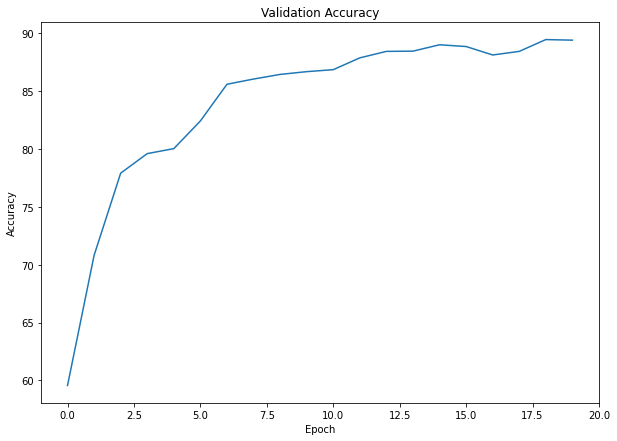

In [10]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 20])
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S9/validation_accuracy_change_plot.jpg')

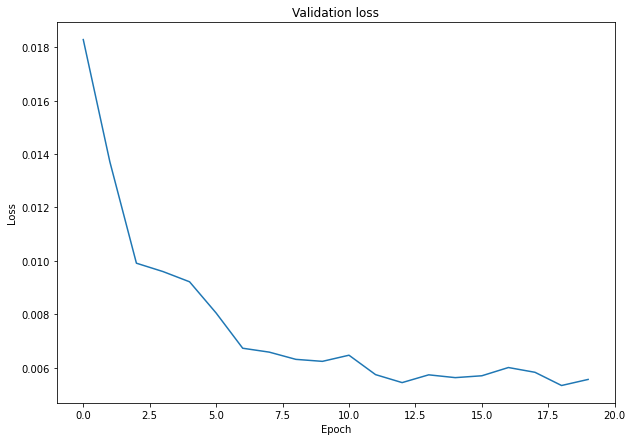

In [11]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 20])
axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S9/validation_loss_change_plot.jpg')

# Actual outputs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse   car  deer  ship


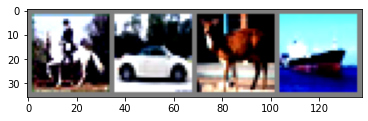

In [12]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Predicted outputs

In [13]:
outputs = net(images.cuda())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  horse   car  deer  ship


# Performance of CIFAR-10 classes


In [14]:
test.test_class_performance(net, device, loader.testloader, classes)

100%|██████████| 157/157 [00:06<00:00, 23.96it/s]

Accuracy of plane : 95 %
Accuracy of   car : 98 %
Accuracy of  bird : 90 %
Accuracy of   cat : 83 %
Accuracy of  deer : 96 %
Accuracy of   dog : 82 %
Accuracy of  frog : 91 %
Accuracy of horse : 91 %
Accuracy of  ship : 100 %
Accuracy of truck : 96 %


# GradCAM Visualization

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


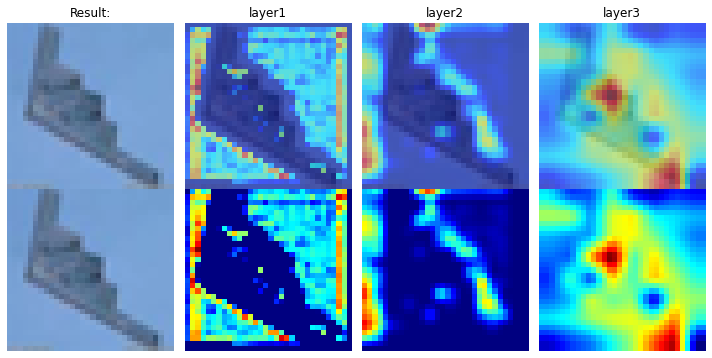

<Figure size 432x288 with 0 Axes>

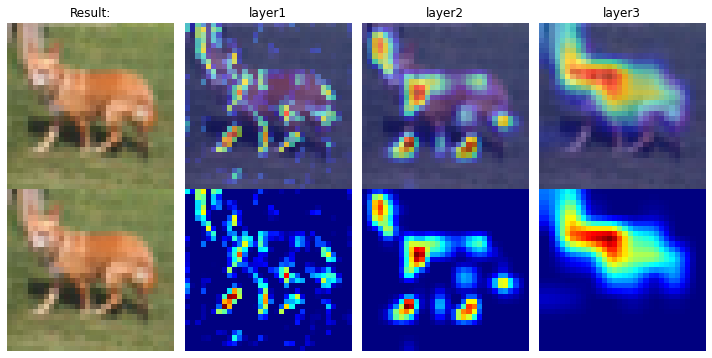

<Figure size 432x288 with 0 Axes>

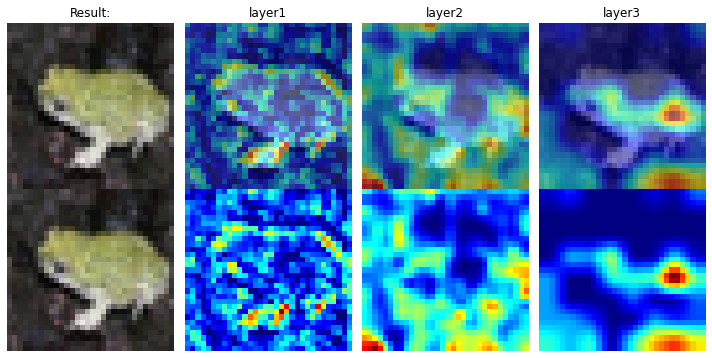

<Figure size 432x288 with 0 Axes>

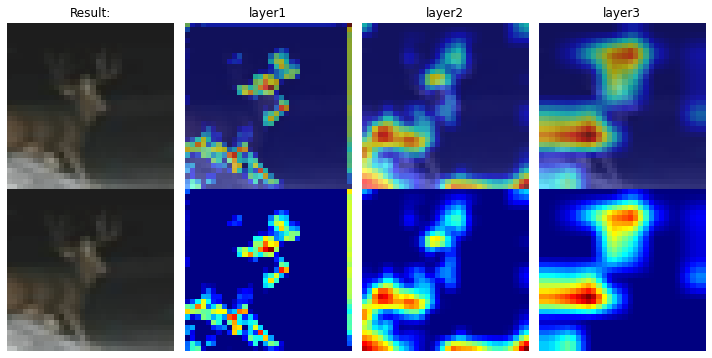

<Figure size 432x288 with 0 Axes>

In [15]:
import random

from utils.gradcam_visualization import GradCAMView

layers = ['layer1', 'layer2', 'layer3']

grad_cam = GradCAMView(
    net, layers, device, loader.mean, loader.std
)

images = [x['image'] for x in random.sample(test.correct_pred, 4)]
grad_cam(images, '/content/gdrive/My Drive/Colab Notebooks/S9/gradcam_images/')